In [21]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

from collections import defaultdict

def plot_confusion_matrices(y_true, y_pred, classes,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        title = 'Confusion matrix'
            
    cm1 = confusion_matrix(y_true, y_pred)
    cm2 = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis]
    
    fig, (ax2) = plt.subplots(1, 1, figsize=(6, 6))
    #fig.suptitle('Horizontally stacked subplots')
    """
    im1 = ax1.imshow(cm1, interpolation='nearest', cmap=cmap)
    #ax1.figure.colorbar(im1, ax=ax1)
    # We want to show all ticks...
    ax1.set(xticks=np.arange(cm1.shape[1]),
           yticks=np.arange(cm2.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax1.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    
    # Loop over data dimensions and create text annotations.
    fmt = 'd'
    thresh = cm1.max() / 2.
    for i in range(cm1.shape[0]):
        for j in range(cm1.shape[1]):
            ax1.text(j, i, format(cm1[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm1[i, j] > thresh else "black")
    """
    im2 = ax2.imshow(cm2, interpolation='nearest', cmap=cmap)
    #ax2.figure.colorbar(im2, ax=ax2)
    # We want to show all ticks...
    ax2.set(xticks=np.arange(cm2.shape[1]),
           yticks=np.arange(cm2.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax2.get_xticklabels(), rotation=0, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f'
    thresh = cm2.max() / 2.
    for i in range(cm2.shape[0]):
        for j in range(cm2.shape[1]):
            ax2.text(j, i, format(cm2[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm2[i, j] > thresh else "black")
    
    #"""
    fig.tight_layout()
    #return cm1
    #return ax1, ax2

In [22]:
import os

In [23]:
def get_labels(paper_id):
    """9:272:21487:20:32:90:279:143:12:Times New Roman:12:Times New Roman:B:administrative identification numbers."""
    #print(os.listdir(f'{paper_id}'))
    
    gt_lines = dict()
    with open(f'{paper_id}/{paper_id}:gt.txt', encoding='utf8') as f:
        for l in f:
            #try:
                l = l.split(':')
                line_id, line_label, line_text = l[1], l[12], ':'.join(l[13:])
                if not len(line_text.strip()):
                    continue
                gt_lines[line_id] = line_label
            #except:
            #    pass
    pr_lines = dict()
    with open(f'{paper_id}/{paper_id}:l.txt', encoding='utf8') as f:
        for l in f:
            #try:
                l = l.split(':')
                line_id, line_label = l[1], l[12]
                pr_lines[line_id] = line_label
            #except:
            #    pass
    y_true = list(gt_lines.values())
    y_pred = list(pr_lines[line_id] for line_id in gt_lines.keys())
    
    return y_true, y_pred

In [24]:
def stats_papers(paper_ids):
    y_test, y_pred = [], []
    
    for paper_id in paper_ids:
        y_test_, y_pred_ = get_labels(paper_id)
        y_test.extend(y_test_)
        y_pred.extend(y_pred_)
    
    ddmap = defaultdict(int)
    ddmap['C'] = 1
    ddmap['A'] = 2
    ddmap['B'] = 3
    
    y_test = np.array(list(map(lambda x: ddmap[x], y_test)))
    y_pred = np.array(list(map(lambda x: ddmap[x], y_pred)))
    
    class_names = ddmap
    
    
    np.set_printoptions(precision=2)

    #fig, (ax1, ax2) = plt.subplots(1, 2)
    #fig.suptitle('Horizontally stacked subplots')
    
    #ax1.plot(plot_confusion_matrix(y_test, y_pred, class_names, normalize=False, title=None, cmap=plt.cm.Blues))
    #ax2.plot(plot_confusion_matrix(y_test, y_pred, class_names, normalize=True, title=None, cmap=plt.cm.Blues))
    
    
    plot_confusion_matrices(y_test, y_pred, classes=['Other', 'Header', 'Par.st.', 'Par.co.'],
                          title=f'Confusion matrix for 8 papers')
    
    #plot_confusion_matrix(y_test, y_pred, classes=['O', 'H', 'S', 'C'], normalize=True,
    #                      title=f'Conf. matrix {paper_id}\n(normalized)')

    #plt.show()
    
    plt.savefig(f'cm_{paper_id}.png')

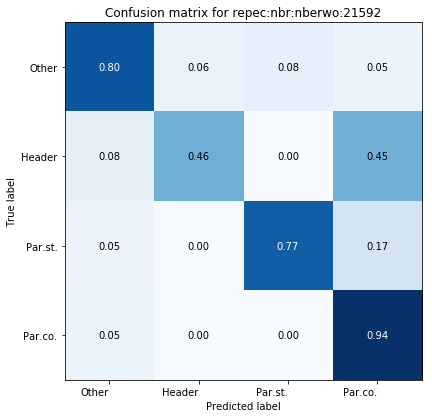

In [25]:
stats_papers(['repec:nbr:nberwo:8269', 
              'repec:nbr:nberwo:8918', 
              'repec:nbr:nberwo:9413', 
              'repec:nbr:nberwo:15174', 
              'repec:nbr:nberwo:19035', 
              'repec:nbr:nberwo:19979',
              'repec:nbr:nberwo:20867', 
              'repec:nbr:nberwo:21592'])